In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import accuracy_score

pd.options.mode.chained_assignment = None

In [2]:
# Read the files
train = pd.read_csv("input/train.csv")
test = pd.read_csv("input/test.csv")

# Merge train and test
train['Type'] = 1
test['Type'] = 0

full_data = pd.concat([train, test], axis=0)

In [3]:
full_data.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay', 'Type'],
      dtype='object')

Review the data

In [4]:
full_data[:100]

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,Type
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,1
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,1
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,1
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,1
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,1,d,10,Y,4,gynecology,Q,B,1.0,21257,7.0,Urgent,Moderate,2,31-40,3750.0,11-20,1
96,97,13,a,5,Z,3,gynecology,R,F,2.0,21257,7.0,Urgent,Moderate,2,31-40,6162.0,21-30,1
97,98,15,c,5,Z,4,gynecology,R,F,2.0,21257,7.0,Urgent,Moderate,3,31-40,5199.0,21-30,1
98,99,12,a,9,Y,3,gynecology,R,B,1.0,21257,7.0,Urgent,Moderate,2,31-40,4796.0,21-30,1


In [5]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455495 entries, 0 to 137056
Data columns (total 19 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            455495 non-null  int64  
 1   Hospital_code                      455495 non-null  int64  
 2   Hospital_type_code                 455495 non-null  object 
 3   City_Code_Hospital                 455495 non-null  int64  
 4   Hospital_region_code               455495 non-null  object 
 5   Available Extra Rooms in Hospital  455495 non-null  int64  
 6   Department                         455495 non-null  object 
 7   Ward_Type                          455495 non-null  object 
 8   Ward_Facility_Code                 455495 non-null  object 
 9   Bed Grade                          455347 non-null  float64
 10  patientid                          455495 non-null  int64  
 11  City_Code_Patient                  4488

In [6]:
full_data.groupby(['Hospital_code'])['Available Extra Rooms in Hospital'].sum()

Hospital_code
1      21634
2      19518
3      34750
4       4902
5      24495
6     100081
7       5496
8      18193
9      54080
10     41808
11     85502
12     51587
13     23385
14     84103
15     46047
16     15298
17     23719
18     17051
19     96254
20      4975
21     33529
22     16468
23    129890
24     37009
25     40926
26    156536
27     65667
28     74870
29     45236
30     24870
31     17700
32     40247
Name: Available Extra Rooms in Hospital, dtype: int64

In [7]:
full_data.groupby(['Hospital_code'])['Department'].value_counts()

Hospital_code  Department        
1              gynecology             6203
               radiotherapy            545
               anesthesia              438
               TB & Chest disease      251
               surgery                  23
                                     ...  
32             gynecology            12243
               radiotherapy           1365
               anesthesia             1023
               TB & Chest disease      578
               surgery                  43
Name: Department, Length: 160, dtype: int64

In [8]:
full_data.groupby(['City_Code_Hospital'])['Hospital_code'].sum()

City_Code_Hospital
1     1278336
2     1547935
3      798861
4      488675
5      458300
6     1054386
7     1117245
9      814236
10       7460
11     688016
13      94104
Name: Hospital_code, dtype: int64

In [9]:
full_data['Type of Admission'].value_counts()

Trauma       217672
Emergency    168363
Urgent        69460
Name: Type of Admission, dtype: int64

In [10]:
full_data['Severity of Illness'].value_counts()

Moderate    251565
Minor       122735
Extreme      81195
Name: Severity of Illness, dtype: int64

In [11]:
full_data.groupby(['Type of Admission', 'Severity of Illness'])['Stay'].value_counts()

Type of Admission  Severity of Illness  Stay              
Emergency          Extreme              11-20                 4402
                                        21-30                 4339
                                        31-40                 3336
                                        51-60                 2627
                                        0-10                  2056
                                                              ... 
Urgent             Moderate             71-80                  736
                                        More than 100 Days     376
                                        81-90                  342
                                        91-100                 178
                                        61-70                  151
Name: Stay, Length: 99, dtype: int64

In [12]:
full_data.groupby(['City_Code_Hospital'])['Hospital_code'].sum()

City_Code_Hospital
1     1278336
2     1547935
3      798861
4      488675
5      458300
6     1054386
7     1117245
9      814236
10       7460
11     688016
13      94104
Name: Hospital_code, dtype: int64

In [13]:
full_data.Stay.unique()

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100', nan],
      dtype=object)

In [14]:
full_data.isnull().any()

case_id                              False
Hospital_code                        False
Hospital_type_code                   False
City_Code_Hospital                   False
Hospital_region_code                 False
Available Extra Rooms in Hospital    False
Department                           False
Ward_Type                            False
Ward_Facility_Code                   False
Bed Grade                             True
patientid                            False
City_Code_Patient                     True
Type of Admission                    False
Severity of Illness                  False
Visitors with Patient                False
Age                                  False
Admission_Deposit                    False
Stay                                  True
Type                                 False
dtype: bool

In [15]:
full_data.isna().sum()

case_id                                   0
Hospital_code                             0
Hospital_type_code                        0
City_Code_Hospital                        0
Hospital_region_code                      0
Available Extra Rooms in Hospital         0
Department                                0
Ward_Type                                 0
Ward_Facility_Code                        0
Bed Grade                               148
patientid                                 0
City_Code_Patient                      6689
Type of Admission                         0
Severity of Illness                       0
Visitors with Patient                     0
Age                                       0
Admission_Deposit                         0
Stay                                 137057
Type                                      0
dtype: int64

In [16]:
full_data.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit,Type
count,455495.00000,455495.000000,455495.000000,455495.000000,455347.000000,455495.000000,448806.000000,455495.000000,455495.000000,455495.000000
mean,227748.00000,18.326335,4.767798,3.196140,2.628420,65786.793563,7.249495,3.284229,4877.434022,0.699103
std,131490.22477,8.634036,3.102450,1.166994,0.871997,37968.830850,4.758941,1.768044,1084.982089,0.458648
min,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000,0.000000
25%,113874.50000,11.000000,2.000000,2.000000,2.000000,32874.000000,4.000000,2.000000,4184.000000,0.000000
50%,227748.00000,19.000000,5.000000,3.000000,3.000000,65735.000000,8.000000,3.000000,4738.000000,1.000000
75%,341621.50000,26.000000,7.000000,4.000000,3.000000,98576.500000,8.000000,4.000000,5405.000000,1.000000
max,455495.00000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11920.000000,1.000000


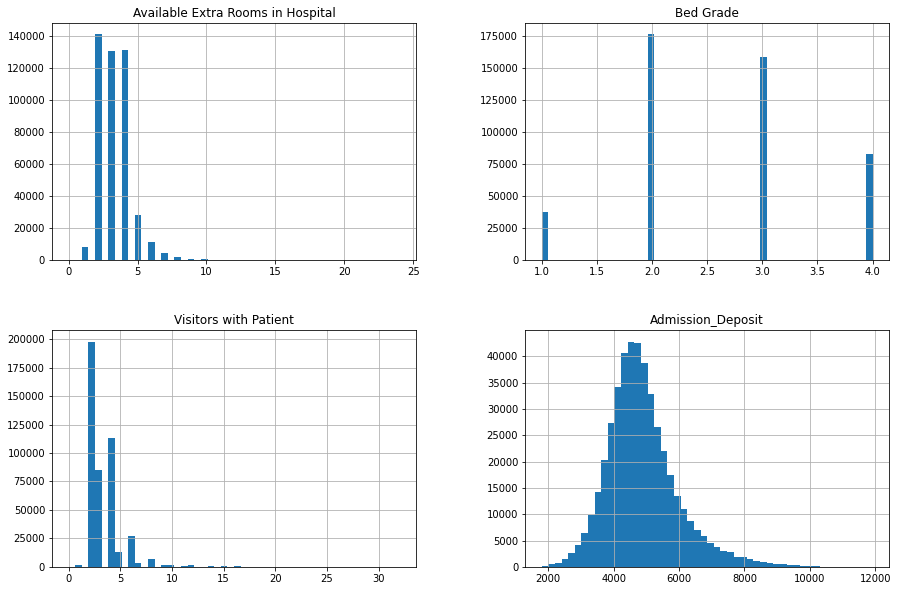

In [17]:
cols = ['Available Extra Rooms in Hospital', 'Bed Grade', 'Visitors with Patient', 'Admission_Deposit']
full_data.hist(column=cols, bins=50, figsize=(15,10))
plt.show()

In [18]:
corr_matrix = full_data.corr()
corr_matrix

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit,Type
case_id,1.000000,-0.024139,-0.008247,0.023878,0.011755,-0.000235,0.038053,0.000818,-0.029820,-0.794402
Hospital_code,-0.024139,1.000000,0.127760,-0.058744,-0.015001,0.002912,-0.015260,-0.028168,0.046347,-0.001323
City_Code_Hospital,-0.008247,0.127760,1.000000,-0.045313,-0.048423,0.001617,-0.025153,0.018377,-0.034767,0.001926
Available Extra Rooms in Hospital,0.023878,-0.058744,-0.045313,1.000000,-0.115303,0.001551,-0.008715,0.095790,-0.143479,0.001942
Bed Grade,0.011755,-0.015001,-0.048423,-0.115303,1.000000,0.000579,-0.007052,0.089361,0.071705,-0.004567
patientid,-0.000235,0.002912,0.001617,0.001551,0.000579,1.000000,0.000979,0.002865,0.000033,-0.001574
City_Code_Patient,0.038053,-0.015260,-0.025153,-0.008715,-0.007052,0.000979,1.000000,-0.012611,0.025665,0.000758
Visitors with Patient,0.000818,-0.028168,0.018377,0.095790,0.089361,0.002865,-0.012611,1.000000,-0.150008,-0.000112
Admission_Deposit,-0.029820,0.046347,-0.034767,-0.143479,0.071705,0.000033,0.025665,-0.150008,1.000000,0.004658
Type,-0.794402,-0.001323,0.001926,0.001942,-0.004567,-0.001574,0.000758,-0.000112,0.004658,1.000000


<AxesSubplot:>

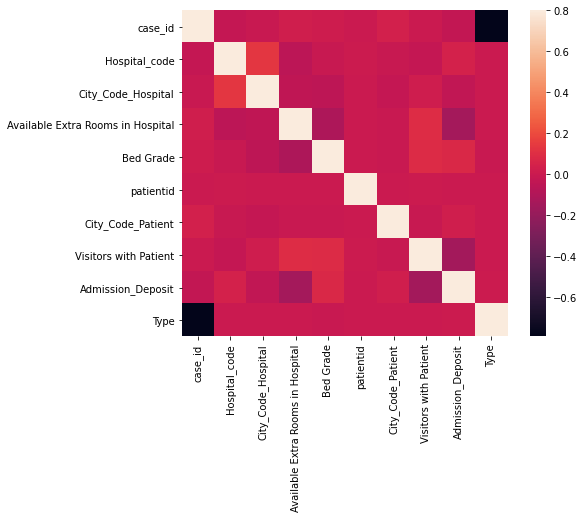

In [19]:
import seaborn as sns
f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(corr_matrix, vmax=0.8, square=True)

From the heat map, we can observe that the variables are not positively correlated. 

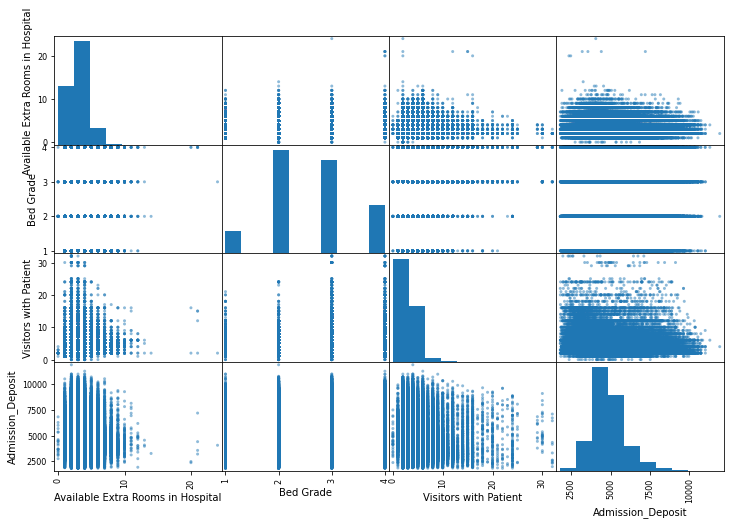

In [20]:
from pandas.plotting import scatter_matrix
scatter_matrix(full_data[cols], figsize=(12,8))
plt.show()

In [21]:
cat_vars = ['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code','Type of Admission',
           'Severity of Illness', 'Age']
#cat_encoder = OneHotEncoder()
#cat_1Hot = cat_encoder.fit_transform(train[cat_vars]).toarray()
#feature_labels = cat_encoder.categories_

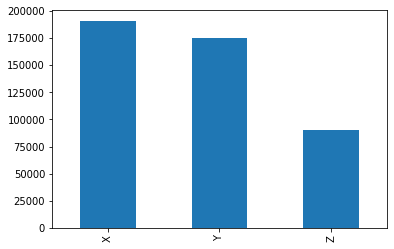

In [22]:
full_data['Hospital_region_code'].value_counts().plot.bar()
plt.show()

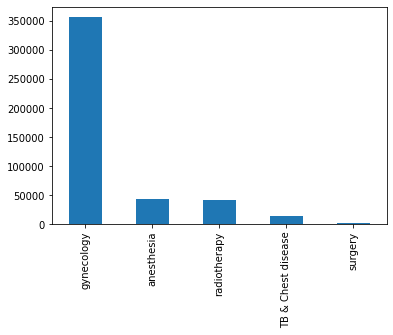

In [23]:
full_data['Department'].value_counts().plot.bar()
plt.show()

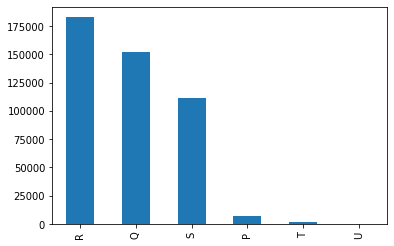

In [24]:
full_data['Ward_Type'].value_counts().plot.bar()
plt.show()

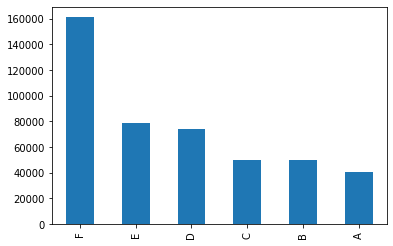

In [25]:
full_data['Ward_Facility_Code'].value_counts().plot.bar()
plt.show()

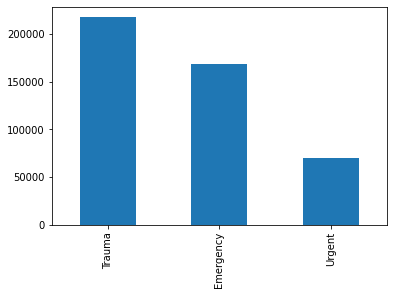

In [26]:
full_data['Type of Admission'].value_counts().plot.bar()
plt.show()

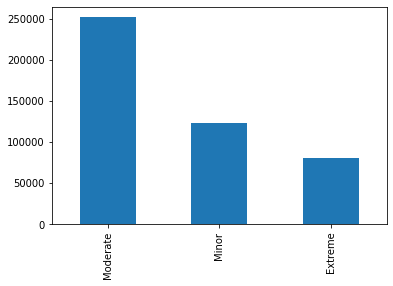

In [27]:
full_data['Severity of Illness'].value_counts().plot.bar()
plt.show()

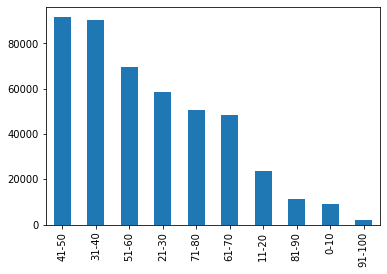

In [28]:
full_data['Age'].value_counts().plot.bar()
plt.show()

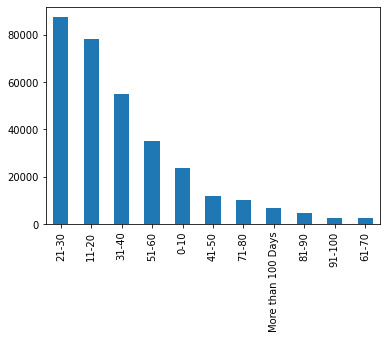

In [29]:
full_data['Stay'].value_counts().plot.bar()
plt.show()

In [30]:
#feature_labels = np.array(feature_labels).ravel()

In [31]:
#feature_labels

In [32]:
#cat_1Hot

In [33]:
#cat_1Hot.shape

In [34]:
cat_dummies = pd.get_dummies(full_data[cat_vars], drop_first=True)

In [35]:
cat_dummies.head()

,Hospital_type_code_b,Hospital_type_code_c,Hospital_type_code_d,Hospital_type_code_e,Hospital_type_code_f,Hospital_type_code_g,Hospital_region_code_Y,Hospital_region_code_Z,Department_anesthesia,Department_gynecology,...,Severity of Illness_Moderate,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [36]:
full_data = pd.concat([full_data, cat_dummies], axis=1)

In [37]:
full_data.drop(cat_vars, inplace=True, axis=1)

In [38]:
full_data.head()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit,Stay,...,Severity of Illness_Moderate,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100
0,1,8,3,3,2.0,31397,7.0,2,4911.0,0-10,...,0,0,0,0,0,1,0,0,0,0
1,2,2,5,2,2.0,31397,7.0,2,5954.0,41-50,...,0,0,0,0,0,1,0,0,0,0
2,3,10,1,2,2.0,31397,7.0,2,4745.0,31-40,...,0,0,0,0,0,1,0,0,0,0
3,4,26,2,2,2.0,31397,7.0,2,7272.0,41-50,...,0,0,0,0,0,1,0,0,0,0
4,5,26,2,2,2.0,31397,7.0,2,5558.0,41-50,...,0,0,0,0,0,1,0,0,0,0


In [39]:
full_data['Bed Grade'].value_counts()

2.0    176451
3.0    158942
4.0     82387
1.0     37567
Name: Bed Grade, dtype: int64

In [40]:
full_data['City_Code_Patient'].value_counts(ascending = False)

8.0     176825
2.0      55681
1.0      37772
7.0      33958
5.0      28978
4.0      22044
9.0      16692
15.0     12804
10.0     11809
6.0       8723
12.0      8124
3.0       5401
23.0      5320
14.0      4218
16.0      3187
21.0      2298
13.0      2228
18.0      2010
20.0      1936
26.0      1522
19.0      1458
25.0      1171
27.0      1032
11.0       933
28.0       714
22.0       534
24.0       514
30.0       194
29.0       192
33.0       121
34.0        96
32.0        95
37.0        78
31.0        67
35.0        30
36.0        29
38.0        18
Name: City_Code_Patient, dtype: int64

In [41]:
full_data['Bed Grade'] = full_data['Bed Grade'].fillna(full_data['Bed Grade'].median())

In [42]:
full_data['City_Code_Patient'] = full_data['City_Code_Patient'].fillna(full_data['City_Code_Patient'].median())

In [43]:
full_data.isna().sum()

case_id                                   0
Hospital_code                             0
City_Code_Hospital                        0
Available Extra Rooms in Hospital         0
Bed Grade                                 0
patientid                                 0
City_Code_Patient                         0
Visitors with Patient                     0
Admission_Deposit                         0
Stay                                 137057
Type                                      0
Hospital_type_code_b                      0
Hospital_type_code_c                      0
Hospital_type_code_d                      0
Hospital_type_code_e                      0
Hospital_type_code_f                      0
Hospital_type_code_g                      0
Hospital_region_code_Y                    0
Hospital_region_code_Z                    0
Department_anesthesia                     0
Department_gynecology                     0
Department_radiotherapy                   0
Department_surgery              

In [44]:
train = full_data[full_data['Type'] == 1]
test = full_data[full_data['Type'] != 1]
y = train['Stay']
train.drop(['Stay', 'Type'], axis=1, inplace=True)
test.drop(['Stay', 'Type'], axis=1, inplace=True)

In [45]:
# Split the training set into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2)

In [46]:
print('X_train.shape', X_train.shape)
print('y_train.shape', y_train.shape)
print('X_test.shape', X_test.shape)
print('y_test.shape', y_test.shape)

X_train.shape (254750, 44)
y_train.shape (254750,)
X_test.shape (63688, 44)
y_test.shape (63688,)


In [47]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254750 entries, 106248 to 215971
Data columns (total 44 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            254750 non-null  int64  
 1   Hospital_code                      254750 non-null  int64  
 2   City_Code_Hospital                 254750 non-null  int64  
 3   Available Extra Rooms in Hospital  254750 non-null  int64  
 4   Bed Grade                          254750 non-null  float64
 5   patientid                          254750 non-null  int64  
 6   City_Code_Patient                  254750 non-null  float64
 7   Visitors with Patient              254750 non-null  int64  
 8   Admission_Deposit                  254750 non-null  float64
 9   Hospital_type_code_b               254750 non-null  uint8  
 10  Hospital_type_code_c               254750 non-null  uint8  
 11  Hospital_type_code_d              

<h3>Random Forest</h3>

In [48]:
# Use the Random Forest Classifier algorithm
rf = RandomForestClassifier(n_estimators=500,max_depth=2, random_state=1)

In [49]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(X_test.shape, y_pred.shape)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

(63688, 44) (63688,)
Accuracy: 28.70%


In [50]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137057 entries, 0 to 137056
Data columns (total 44 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            137057 non-null  int64  
 1   Hospital_code                      137057 non-null  int64  
 2   City_Code_Hospital                 137057 non-null  int64  
 3   Available Extra Rooms in Hospital  137057 non-null  int64  
 4   Bed Grade                          137057 non-null  float64
 5   patientid                          137057 non-null  int64  
 6   City_Code_Patient                  137057 non-null  float64
 7   Visitors with Patient              137057 non-null  int64  
 8   Admission_Deposit                  137057 non-null  float64
 9   Hospital_type_code_b               137057 non-null  uint8  
 10  Hospital_type_code_c               137057 non-null  uint8  
 11  Hospital_type_code_d               1370

In [51]:
test.isnull().sum()

case_id                              0
Hospital_code                        0
City_Code_Hospital                   0
Available Extra Rooms in Hospital    0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Visitors with Patient                0
Admission_Deposit                    0
Hospital_type_code_b                 0
Hospital_type_code_c                 0
Hospital_type_code_d                 0
Hospital_type_code_e                 0
Hospital_type_code_f                 0
Hospital_type_code_g                 0
Hospital_region_code_Y               0
Hospital_region_code_Z               0
Department_anesthesia                0
Department_gynecology                0
Department_radiotherapy              0
Department_surgery                   0
Ward_Type_Q                          0
Ward_Type_R                          0
Ward_Type_S                          0
Ward_Type_T                          0
Ward_Type_U              

In [52]:
pred = rf.predict(test)
test['Stay'] = pred

In [53]:
test.insert(0,'ID', 'case_id')
test.head()

,ID,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit,...,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100,Stay
0,case_id,318439,21,3,3,2.0,17006,2.0,2,3095.0,...,0,0,0,0,0,0,1,0,0,21-30
1,case_id,318440,29,4,2,2.0,17006,2.0,4,4018.0,...,0,0,0,0,0,0,1,0,0,21-30
2,case_id,318441,26,2,3,4.0,17006,2.0,3,4492.0,...,0,0,0,0,0,0,1,0,0,21-30
3,case_id,318442,6,6,3,2.0,17006,2.0,3,4173.0,...,0,0,0,0,0,0,1,0,0,21-30
4,case_id,318443,28,11,2,2.0,17006,2.0,4,4161.0,...,0,0,0,0,0,0,1,0,0,21-30


In [54]:
# Copy the output with ID and Segmentation to a CSV file
test.to_csv("patient_length_of_stay.csv", columns=['case_id', 'Stay'], index=False)

<h3>LightGBM</h3>

In [55]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [56]:
lgb_clf = LGBMClassifier(max_depth=4, objective='multiclass', random_state=42)
#clf2 = lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=80, min_data_in_leaf=307, max_iter=1000, max_depth=7, learning_rate=0.1)
#rf = LGBMClassifier(learning_rate=0.02,
#                    boosting_type='gbdt', max_depth=4,  objective='multiclass', 
#                    random_state=100,  
#                  n_estimators=1000 ,reg_alpha=0, reg_lambda=1, n_jobs=-1)

In [57]:
lgb_clf.fit(X_train, y_train)
y_pred = lgb_clf.predict(X_test)
print(X_test.shape, y_pred.shape)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

(63688, 44) (63688,)
Accuracy: 42.04%


<h3>Support Vector Classifier</h3>

In [58]:
svc_clf = SVC()

In [ ]:
svc_clf.fit(X_train, y_train)
y_pred = svc_clf.predict(X_test)
print(X_test.shape, y_pred.shape)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))